In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn
import cv2

In [2]:
from PIL import Image 
import os, random

In [3]:

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.optimizers import Adam, SGD, RMSprop

In [4]:
data = os.listdir(r"Digits" )
data_X = []     
data_y = []  
data_classes = len(data)
for i in range (0,data_classes):
    data_list = os.listdir(r"Digits" +"/"+str(i))
    for j in data_list:
        pic = cv2.imread(r"Digits" +"/"+str(i)+"/"+j)
        pic = cv2.resize(pic,(32,32))
        data_X.append(pic)
        data_y.append(i)

         
if len(data_X) == len(data_y) :
    print("Total Dataponits = ",len(data_X))

#labels and images
data_X = np.array(data_X)
data_y = np.array(data_y)

Total Dataponits =  10160


In [5]:
data_X

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
        

In [6]:
data_y

array([0, 0, 0, ..., 9, 9, 9])

In [7]:
train_X, test_X, train_y, test_y = train_test_split(data_X,data_y,test_size=0.05, shuffle=True)
train_X, valid_X, train_y, valid_y = train_test_split(train_X,train_y,test_size=0.2, shuffle=True)

In [8]:
print("Test Set Shape = ",test_X.shape)
print("Training Set Shape = ",train_X.shape)
print("Validation Set Shape = ",valid_X.shape)

Test Set Shape =  (508, 32, 32, 3)
Training Set Shape =  (7721, 32, 32, 3)
Validation Set Shape =  (1931, 32, 32, 3)


In [9]:
#preprocessing of digit images
def Prep(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
    img = cv2.equalizeHist(img)
    img = img/255
    return img


train_X = np.array(list(map(Prep, train_X)))
test_X = np.array(list(map(Prep, test_X)))
valid_X= np.array(list(map(Prep, valid_X)))

In [10]:
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], train_X.shape[2],1)
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], test_X.shape[2],1)
valid_X = valid_X.reshape(valid_X.shape[0], valid_X.shape[1], valid_X.shape[2],1)

In [11]:
#data augemantion
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, shear_range=0.1, rotation_range=10)
datagen.fit(train_X)

In [12]:
#dummy encoding for digit classes
train_y = to_categorical(train_y, data_classes)
test_y = to_categorical(test_y, data_classes)
valid_y = to_categorical(valid_y, data_classes)

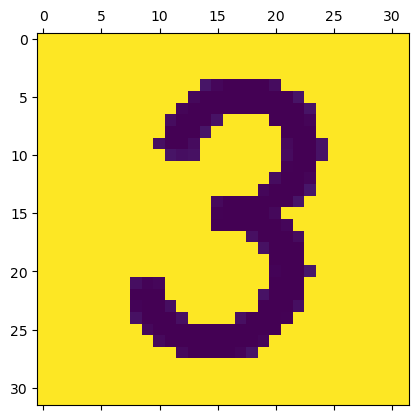

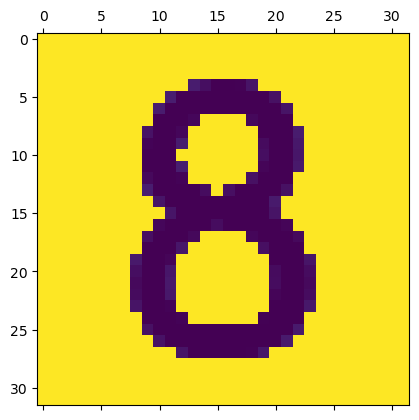

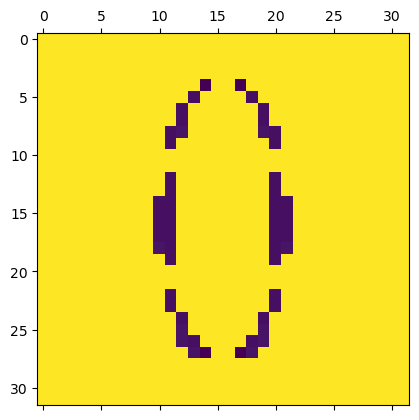

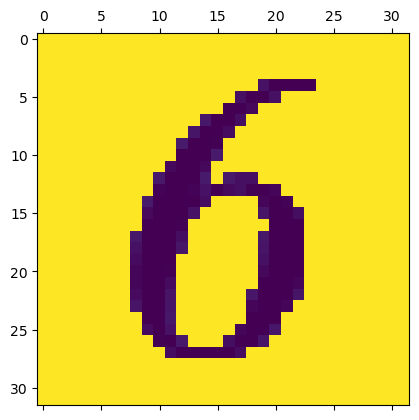

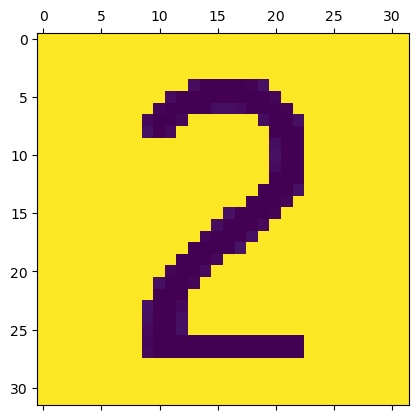

In [13]:
for i in range(5):
    plt.matshow(train_X[i])
    plt.show()

In [14]:
model = keras.Sequential()

model.add((Conv2D(60,(5,5),input_shape=(32, 32, 1) ,padding = 'Same' ,activation='relu')))
model.add((Conv2D(60, (5,5),padding="same",activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add((Conv2D(30, (3,3),padding="same", activation='relu')))
model.add((Conv2D(30, (3,3), padding="same", activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 60)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 30)        8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 30)         0         
 2D)                                                    

In [15]:
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon = 1e-08, decay=0.0)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(datagen.flow(train_X, train_y, batch_size=32),epochs = 30, validation_data = (valid_X, valid_y),verbose = 2, steps_per_epoch= 200)

Epoch 1/30
200/200 - 24s - loss: 0.9308 - accuracy: 0.6818 - val_loss: 0.0957 - val_accuracy: 0.9674 - 24s/epoch - 122ms/step
Epoch 2/30
200/200 - 23s - loss: 0.2775 - accuracy: 0.9163 - val_loss: 0.0793 - val_accuracy: 0.9746 - 23s/epoch - 116ms/step
Epoch 3/30
200/200 - 24s - loss: 0.1951 - accuracy: 0.9374 - val_loss: 0.0412 - val_accuracy: 0.9860 - 24s/epoch - 121ms/step
Epoch 4/30
200/200 - 24s - loss: 0.1730 - accuracy: 0.9472 - val_loss: 0.0499 - val_accuracy: 0.9824 - 24s/epoch - 121ms/step
Epoch 5/30
200/200 - 23s - loss: 0.1292 - accuracy: 0.9589 - val_loss: 0.0286 - val_accuracy: 0.9896 - 23s/epoch - 117ms/step
Epoch 6/30
200/200 - 20s - loss: 0.1322 - accuracy: 0.9622 - val_loss: 0.0292 - val_accuracy: 0.9891 - 20s/epoch - 102ms/step
Epoch 7/30
200/200 - 21s - loss: 0.1121 - accuracy: 0.9633 - val_loss: 0.0343 - val_accuracy: 0.9907 - 21s/epoch - 103ms/step
Epoch 8/30
200/200 - 22s - loss: 0.1023 - accuracy: 0.9685 - val_loss: 0.0287 - val_accuracy: 0.9933 - 22s/epoch - 111

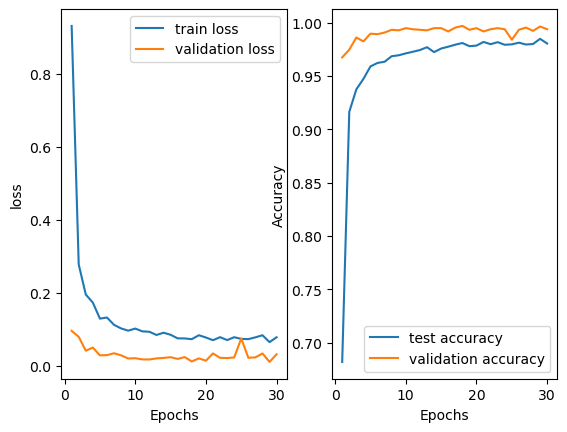

In [17]:
fig1, ax1 = plt.subplots(1, 2)
e = [i for i in range(1, 31)]
ax1[0].plot(e, history.history['loss'], label='train loss')
ax1[0].plot(e, history.history['val_loss'], label='validation loss')
ax1[0].legend()
ax1[0].set_xlabel("Epochs")
ax1[0].set_ylabel("loss")

ax1[1].plot(e, history.history['accuracy'], label='test accuracy')
ax1[1].plot(e, history.history['val_accuracy'], label='validation accuracy')
ax1[1].legend()
ax1[1].set_xlabel('Epochs')
ax1[1].set_ylabel('Accuracy')
plt.show()

File name:  _206_5425624.jpeg 



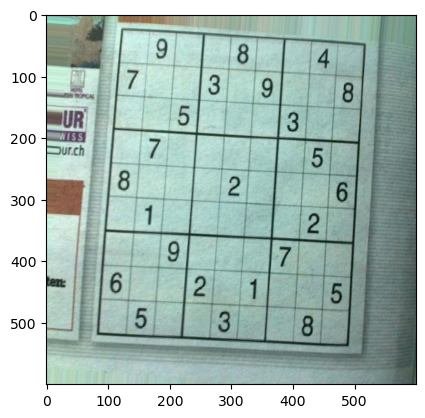

In [18]:
a=random.choice(os.listdir("inputs"))
print("File name: ", a, "\n")

sudoku_a = cv2.imread("inputs"+'/'+a)
plt.figure()
plt.imshow(sudoku_a)
plt.show() 

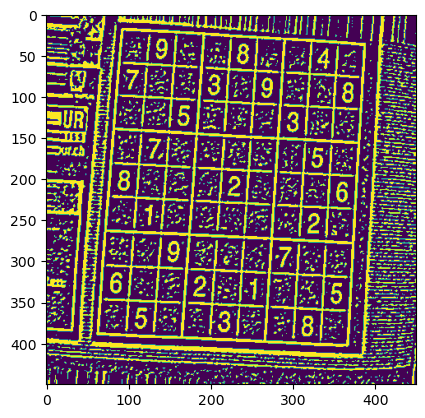

In [19]:
sudoku_a = cv2.resize(sudoku_a, (450,450))

# function to greyscale, blur and change the receptive threshold of image
def preprocess(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    blur = cv2.GaussianBlur(gray, (3,3),6) 
    threshold_img = cv2.adaptiveThreshold(blur,255,1,1,11,2)
    return threshold_img

threshold = preprocess(sudoku_a)

plt.figure()
plt.imshow(threshold)
plt.show()

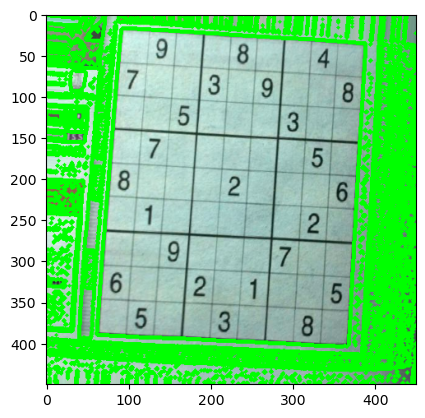

In [20]:
contour_1 = sudoku_a.copy()
contour_2 = sudoku_a.copy()
contour, hierarchy = cv2.findContours(threshold,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(contour_1, contour,-1,(0,255,0),3)

plt.figure()
plt.imshow(contour_1)
plt.show()

In [21]:
def main_outline(contour):
    biggest = np.array([])
    max_area = 0
    for i in contour:
        area = cv2.contourArea(i)
        if area >50:
            peri = cv2.arcLength(i, True)
            approx = cv2.approxPolyDP(i , 0.02* peri, True)
            if area > max_area and len(approx) ==4:
                biggest = approx
                max_area = area
    return biggest ,max_area

def reframe(points):
    points = points.reshape((4, 2))
    points_new = np.zeros((4,1,2),dtype = np.int32)
    add = points.sum(1)
    points_new[0] = points[np.argmin(add)]
    points_new[3] = points[np.argmax(add)]
    diff = np.diff(points, axis =1)
    points_new[1] = points[np.argmin(diff)]
    points_new[2] = points[np.argmax(diff)]
    return points_new

def splitcells(img):
    rows = np.vsplit(img,9)
    boxes = []
    for r in rows:
        cols = np.hsplit(r,9)
        for box in cols:
            boxes.append(box)
    return boxes


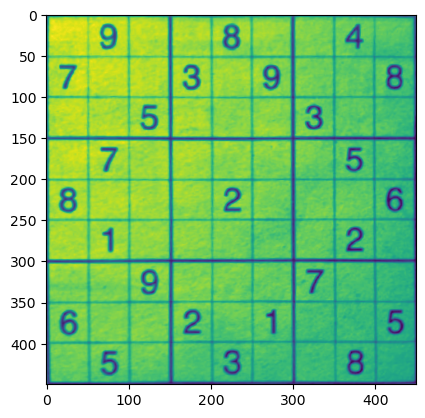

In [22]:
black_img = np.zeros((450,450,3), np.uint8)
biggest, maxArea = main_outline(contour)
if biggest.size != 0:
    biggest = reframe(biggest)
    cv2.drawContours(contour_2,biggest,-1, (0,255,0),10)
    pts1 = np.float32(biggest)
    pts2 = np.float32([[0,0],[450,0],[0,450],[450,450]])
    matrix = cv2.getPerspectiveTransform(pts1,pts2)  
    imagewrap = cv2.warpPerspective(sudoku_a,matrix,(450,450))
    imagewrap =cv2.cvtColor(imagewrap, cv2.COLOR_BGR2GRAY)
    
plt.figure()
plt.imshow(imagewrap)
plt.show()

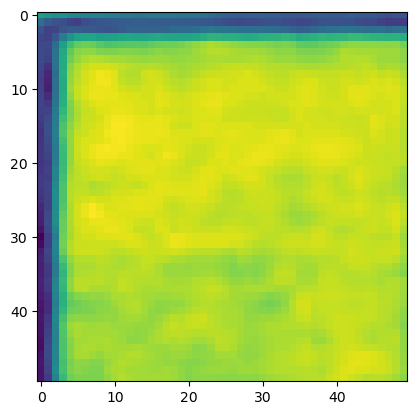

In [23]:
sudoku_cell = splitcells(imagewrap)

#Let's have alook at the first cell
plt.figure()
plt.imshow(sudoku_cell[0])
plt.show()


In [24]:
def CropCell(cells):
    Cells_croped = []
    for image in cells:
        
        img = np.array(image)
        img = img[4:46, 6:46]
        img = Image.fromarray(img)
        Cells_croped.append(img)
        
    return Cells_croped

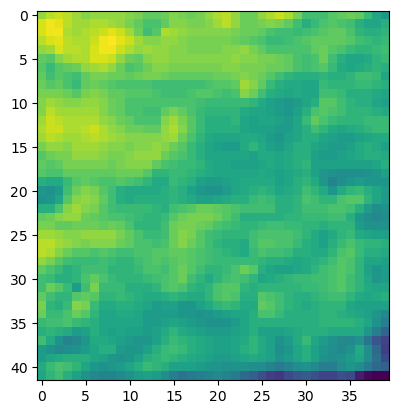

In [25]:
sudoku_cell_croped= CropCell(sudoku_cell)

#Let's have alook at the last cell
plt.figure()
plt.imshow(sudoku_cell_croped[80])
plt.show()

In [28]:
def read_cells(cell,model):

    result = []
    for image in cell:
        # preprocess the image as it was in the model 
        img = np.asarray(image)
        img = img[4:img.shape[0] - 4, 4:img.shape[1] -4]
        img = cv2.resize(img, (32, 32))
        img = img / 255
        img = img.reshape(1, 32, 32, 1)
        # getting predictions and setting the values if probabilities are above 50% 
        
        predictions = model.predict(img)
        classIndex = [np.argmax(i) for i in predictions]
        probabilityValue = np.amax(predictions)
        
        if probabilityValue > 0.50:
            result.append(classIndex[0])
        else:
            result.append(0)
    return result

In [29]:
grid = read_cells(sudoku_cell_croped, model)
grid = np.asarray(grid)

1/1 [==============================] - 0s 17ms/step


In [30]:
grid = np.reshape(grid,(9,9))
grid

array([[0, 9, 0, 0, 8, 0, 0, 4, 0],
       [7, 0, 0, 3, 0, 9, 0, 0, 8],
       [0, 0, 5, 0, 0, 0, 3, 0, 0],
       [0, 7, 0, 0, 0, 0, 0, 5, 0],
       [8, 0, 0, 0, 2, 0, 0, 0, 6],
       [0, 7, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 9, 0, 0, 0, 7, 0, 0],
       [6, 0, 0, 2, 0, 7, 0, 0, 5],
       [0, 5, 0, 0, 3, 0, 0, 8, 0]], dtype=int64)

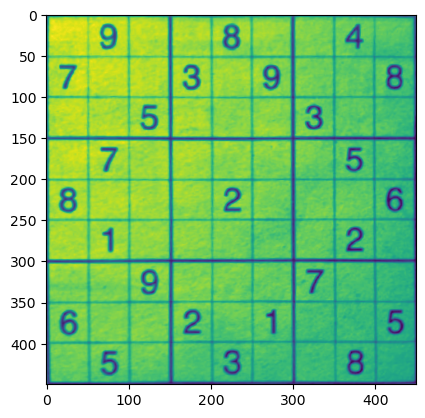

In [31]:
plt.figure()
plt.imshow(imagewrap)
plt.show()

In [52]:
df = pd.read_csv('sudoku.csv')
df = df.head(25000)
df.head()

,quizzes,solutions
0,0043002090050090010700600430060020871900074000...,8643712593258497619712658434361925871986574322...
1,0401000501070039605200080000000000170009068008...,3461792581875239645296483719658324174729168358...
2,6001203840084590720000060050002640300700800069...,6951273841384596727248369158512647392739815469...
3,4972000001004000050000160986203000403009000000...,4972583161864397252537164986293815473759641828...
4,0059103080094030600275001000300002010008200070...,4659123781894735623275681497386452919548216372...


In [53]:
df.shape

(25000, 2)

In [54]:
X = np.array(df.quizzes.map(lambda x: list(map(int, x))).to_list())
y = np.array(df.solutions.map(lambda x: list(map(int, x))).to_list())

In [55]:
X.shape, y.shape

((25000, 81), (25000, 81))

In [56]:
X = X.reshape(-1, 9, 9, 1)
y = y.reshape(-1, 9, 9) - 1


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [58]:
X_train.shape

(20000, 9, 9, 1)

In [59]:
model = Sequential()
model.add(Conv2D(128, 3, activation='relu', padding='same', input_shape=(9,9,1)))
model.add(BatchNormalization())
model.add(Conv2D(128, 3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, 3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, 3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, 3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, 3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(1024, 3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(9, 1, activation='relu', padding='same'))
model.add(Flatten())
model.add(Dense(512))
model.add(Dense(81*9))
model.add(tf.keras.layers.LayerNormalization(axis=-1))
model.add(tf.keras.layers.Reshape((9,9,9)))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.01),metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 9, 9, 128)         1280      
                                                                 
 batch_normalization_14 (Bat  (None, 9, 9, 128)        512       
 chNormalization)                                                
                                                                 
 conv2d_21 (Conv2D)          (None, 9, 9, 128)         147584    
                                                                 
 batch_normalization_15 (Bat  (None, 9, 9, 128)        512       
 chNormalization)                                                
                                                                 
 conv2d_22 (Conv2D)          (None, 9, 9, 256)         295168    
                                                                 
 batch_normalization_16 (Bat  (None, 9, 9, 256)       

In [61]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [63]:
history = model.fit(X_train, y_train, batch_size = 64, epochs = 100,validation_data=(X_test, y_test), callbacks=[callback])

Epoch 1/100
313/313 [==============================] - 374s 1s/step - loss: 2.1262 - accuracy: 0.1526 - val_loss: 2.0821 - val_accuracy: 0.1749
Epoch 2/100
313/313 [==============================] - 360s 1s/step - loss: 1.8165 - accuracy: 0.2719 - val_loss: 1.8553 - val_accuracy: 0.2618
Epoch 3/100
313/313 [==============================] - 355s 1s/step - loss: 1.7188 - accuracy: 0.3111 - val_loss: 1.7657 - val_accuracy: 0.2848
Epoch 4/100
313/313 [==============================] - 362s 1s/step - loss: 1.6888 - accuracy: 0.3218 - val_loss: 1.7338 - val_accuracy: 0.2941
Epoch 5/100
313/313 [==============================] - 355s 1s/step - loss: 1.6665 - accuracy: 0.3288 - val_loss: 1.7121 - val_accuracy: 0.2995
Epoch 6/100
313/313 [==============================] - 342s 1s/step - loss: 1.6487 - accuracy: 0.3339 - val_loss: 1.7202 - val_accuracy: 0.2985
Epoch 7/100
313/313 [==============================] - 358s 1s/step - loss: 1.6335 - accuracy: 0.3381 - val_loss: 1.6934 - val_accuracy:

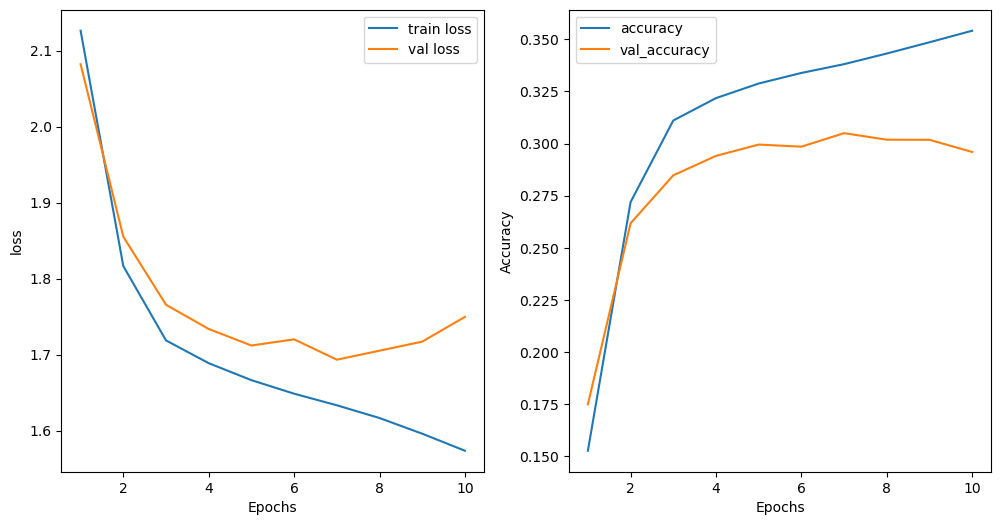

In [65]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12,6)
e = [i for i in range(1, 11)]
ax[0].plot(e, history.history['loss'], label='train loss')
ax[0].plot(e, history.history['val_loss'], label='val loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("loss")

ax[1].plot(e, history.history['accuracy'], label='accuracy')
ax[1].plot(e, history.history['val_accuracy'], label='val_accuracy')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
plt.show()

In [66]:
model.evaluate(X_test, y_test)

157/157 [==============================] - 16s 100ms/step - loss: 1.7497 - accuracy: 0.2960


[1.7497175931930542, 0.29596543312072754]

In [67]:
grid

array([[0, 9, 0, 0, 8, 0, 0, 4, 0],
       [7, 0, 0, 3, 0, 9, 0, 0, 8],
       [0, 0, 5, 0, 0, 0, 3, 0, 0],
       [0, 7, 0, 0, 0, 0, 0, 5, 0],
       [8, 0, 0, 0, 2, 0, 0, 0, 6],
       [0, 7, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 9, 0, 0, 0, 7, 0, 0],
       [6, 0, 0, 2, 0, 7, 0, 0, 5],
       [0, 5, 0, 0, 3, 0, 0, 8, 0]], dtype=int64)

In [68]:
pre = model.predict(grid.reshape(1, 9, 9, 1)).argmax(-1).squeeze()+1

1/1 [==============================] - 0s 150ms/step


In [69]:
model.predict(grid.reshape(1, 9, 9, 1)).argmax(-1).squeeze()+1

1/1 [==============================] - 0s 21ms/step


array([[7, 9, 1, 3, 8, 5, 2, 5, 4],
       [1, 5, 5, 7, 4, 9, 6, 3, 8],
       [3, 8, 8, 5, 1, 1, 5, 9, 9],
       [7, 3, 6, 9, 9, 4, 8, 2, 3],
       [8, 1, 3, 2, 6, 2, 4, 1, 1],
       [9, 7, 1, 5, 3, 8, 2, 4, 5],
       [1, 1, 9, 8, 7, 8, 3, 6, 5],
       [3, 8, 8, 7, 9, 5, 6, 1, 2],
       [7, 3, 1, 1, 2, 7, 9, 8, 7]], dtype=int64)